# Packages | Functions | Papers of Interest

In [1]:
cols = ['x','y','z','u','v','w']
colz = ['Jr','Lz','Jz']
color_palette = ['#4682b4', '#87cefa', '#cd5c5c']

%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sns 
import statistics as stat
import scipy.stats as st
import random as rand
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import astropy.coordinates as coord
import astropy.units as u
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleStaeckel
aAS= actionAngleStaeckel(pot=MWPotential2014,delta=0.4,c=False) 

# basic functions
def pc_ly(x):
    return (1/(float(x)/1000))*3.26156
def mas_deg(x):
    return x*(1/1000)/3600
def abs_mag(x,y):
    return x - (5 * (np.log10(y/10))) 
def color(x,y):
    return [y[i]-x[i] for i in range(len(x))]
def z_score(x,y,z):
    return (x-y)/z
def rnd(x):
    return round(x,2)
def rnd4(x):
    return round(x,4)
def dist(x):
    return 1/(x/1000)
def V(myarg):
    return (myarg / myarg.unit).value

# transformations / functional data manipulation 
def sixspace(data,_):
    v_sun = coord.CartesianDifferential([0,0,0]*u.km/u.s) # [0,0,0] / [11.1, 12.24, 7.25]
    c = coord.ICRS(ra = data['ra'][_]*u.degree, dec=data['dec'][_]*u.degree,
                distance=(data['parallax'][_]*u.mas).to(u.pc, u.parallax()),
                pm_ra_cosdec=data['pmra'][_]*u.mas/u.yr,
                pm_dec=data['pmdec'][_]*u.mas/u.yr,
                radial_velocity=data['radial_velocity'][_]*u.km/u.s)

    gc_frame = coord.Galactocentric(galcen_distance=8*u.kpc,
                                galcen_v_sun=v_sun,
                                z_sun=0*u.pc)
    gc = c.transform_to(gc_frame)
    return [V(gc.x)+8000, V(gc.y), V(gc.z), V(gc.v_x), V(gc.v_y), V(gc.v_z)]
def threespace(dat,_):
    v_sun = coord.CartesianDifferential([0,0,0]*u.km/u.s) 
    c = coord.ICRS(ra = dat['ra'][_]*u.degree, dec=dat['dec'][_]*u.degree,
                distance=(dat['parallax'][_]*u.mas).to(u.pc, u.parallax()),
                pm_ra_cosdec=dat['pmra'][_]*u.mas/u.yr,
                pm_dec=dat['pmdec'][_]*u.mas/u.yr,
                radial_velocity=0*u.km/u.s)

    gc_frame = coord.Galactocentric(galcen_distance=8*u.kpc,
                                galcen_v_sun=v_sun,
                                z_sun=0*u.pc)
    gc = c.transform_to(gc_frame)
    return [V(gc.x)+8000, V(gc.y), V(gc.z), V(gc.v_x), V(gc.v_y), V(gc.v_z)]
def astroFrame(data):
    lis = []
    for i in range(len(data)):
        lis.append(sixspace(data,i))
    return pd.DataFrame(lis,columns = cols)
def astroFrame_norv(dat):
    lis = []
    for i in range(len(dat)):
        lis.append(threespace(dat,i))
    return pd.DataFrame(lis,columns = cols)
def stae(df):
    lis = []
    for i in range(len(df)):
        op= Orbit(vxvv=[df['ra'][i],df['dec'][i],1/(df['parallax'][i]/1000)/1000,\
               df['pmra'][i],df['pmdec'][i],df['radial_velocity'][i]],radec=True)
        lis.append(aAS(op))
    return lis
def stae1(df):
    lis = []
    for i in range(len(df)):
        op= Orbit(vxvv=[df['ra'][i],df['dec'][i],1/(df['parallax'][i]/1000)/1000,\
               df['pmra'][i],df['pmdec'][i],df['rad_v'][i]],radec=True)
        lis.append(aAS(op))
    return lis

  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_interppotential_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_integrate_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_integrate_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_actionAngle_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/landonbuechner/anaconda3/lib/python3.6/site-packages/galpy_actionAngle_c.cpython-36m-darwin.so
  Reason: image not found' 


Globular Cluster Evolution / N-Body Simulation:
- https://www.researchgate.net/publication/1799679_Formation_and_Evolution_of_Clumpy_Tidal_Tails_around_Globular_Clusters

# NGC 6121 - Initial Data with spectroscopic radial velocity

SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec,gaia.dec_error, 
gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error, gaia.radial_velocity, 
gaia.radial_velocity_error, gaia.parallax, gaia.parallax_error, gaia.phot_g_mean_mag, 
gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag 
FROM gaiadr2.gaia_source as gaia 
WHERE gaia.parallax >= 0.385  and gaia.parallax <= 0.55 and gaia.ra > 234 and gaia.ra < 257 
and gaia.dec > -37 and gaia.dec < -15 and gaia.parallax_error < .1 and gaia.radial_velocity_error < 2.5 
and gaia.pmra_error < .15 and gaia.pmdec_error < .15 and 
gaia.pmra is not null and gaia.pmdec is not null and gaia.phot_bp_mean_mag is not null and 
gaia.phot_rp_mean_mag is not null and gaia.phot_g_mean_mag is not null and gaia.radial_velocity is not null

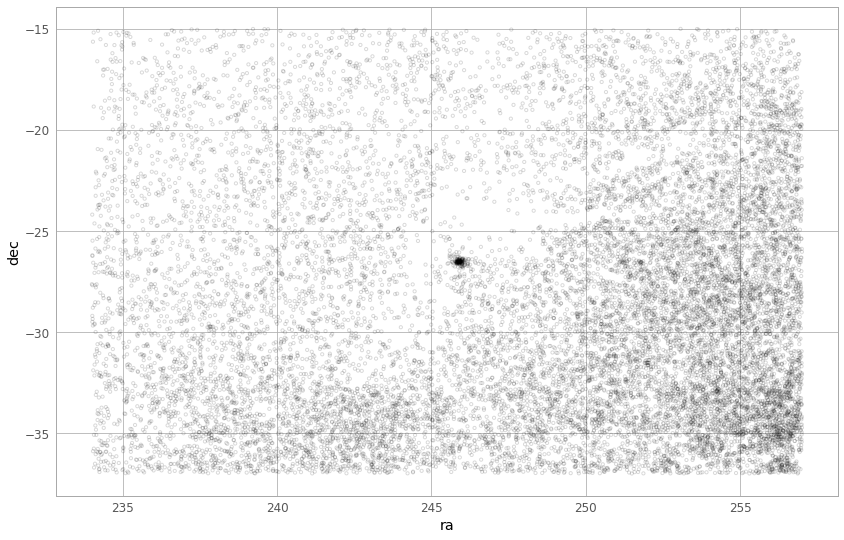

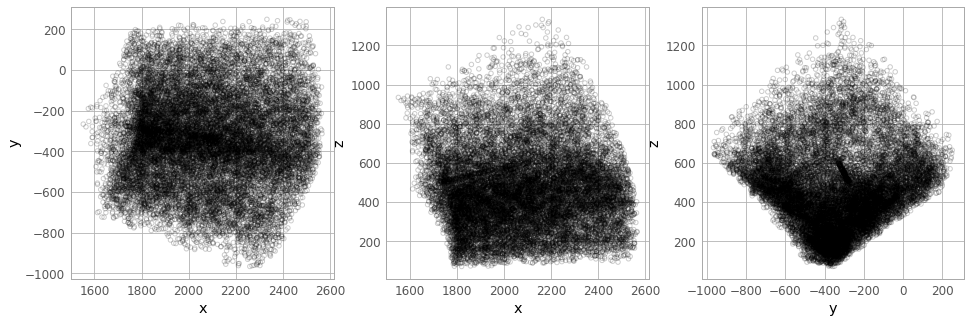

In [2]:
messier = pd.read_csv('/Users/landonbuechner/Desktop/Astronomy/Messier 4/messier4.csv')
messier['id'] = [i for i in range(len(messier))]
#astroFrame(messier).to_csv('messier4_gal.csv', encoding='utf-8', index=False)
messier_gal = pd.read_csv('/Users/landonbuechner/Desktop/Astronomy/Messier 4/messier4_gal.csv')
messier_stae = pd.read_csv('/Users/landonbuechner/Desktop/Astronomy/Messier 4/m4staeck.csv')

messier_core = []
for i in range(len(messier)):
    if messier['ra'][i] > 244.8-1 and messier['ra'][i] < 247+1 and\
    messier['dec'][i] > -28-1 and messier['dec'][i] < -25+1:
        messier_core.append(list(messier.loc[i]))
messier_core = pd.DataFrame(messier_core, columns = list(messier))

plt.figure(figsize=(14,9))
plt.scatter(messier['ra'],messier['dec'], alpha=.15, s=10, edgecolors = 'k', facecolors='none')
plt.xlabel('ra')
plt.ylabel('dec')
plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize = (16,5))
ax1.scatter(messier_gal['x'],messier_gal['y'],s=20,edgecolors = 'k',facecolors='none',alpha=.2)
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax2.scatter(messier_gal['x'],messier_gal['z'],s=20,edgecolors = 'k',facecolors='none',alpha=.2)
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax3.scatter(messier_gal['y'],messier_gal['z'],s=20,edgecolors = 'k',facecolors='none',alpha=.2)
ax3.set_xlabel('y'), ax3.set_ylabel('z')
plt.show()

## Core members with spectroscopic radial velocity 

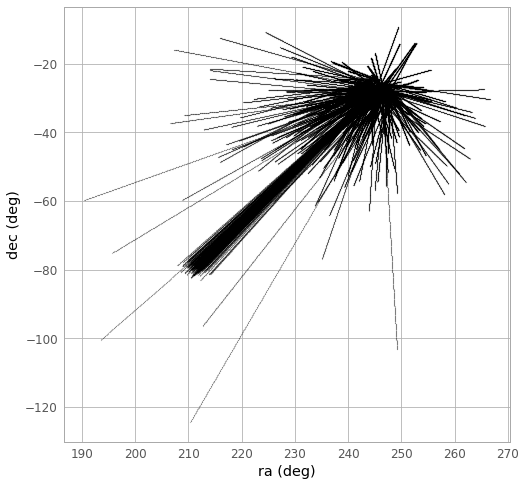

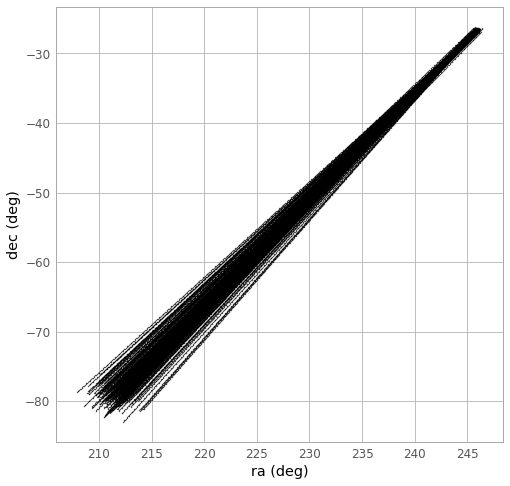

In [3]:
plt.figure(figsize=(8,8))
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')

ra0, dec0 = messier_core['ra'], messier_core['dec'] 
pmra, pmdec = mas_deg(messier_core['pmra']), mas_deg(messier_core['pmdec'])

for i in range(len(messier_core)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    plt.scatter(ra, dec, s = .01, c = 'k'  )
plt.show()

raa = []
decc = []
for i in range(len(messier_core)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    raa.append(ra)
    decc.append(dec)

mov_clust = []

for i in range(len(raa)):
    for x in range(len(raa[i])):
        if raa[i][x] <= 220 and raa[i][x] >= 210 and \
        decc[i][x] <= -73 and decc[i][x] >= -85:
            mov_clust.append(list(messier_core.loc[i]))
            break

mov_clust = pd.DataFrame(mov_clust, columns = list(messier))

ra0, dec0 = mov_clust['ra'], mov_clust['dec'] 
pmra, pmdec = mas_deg(mov_clust['pmra']), mas_deg(mov_clust['pmdec'])

for i in range(len(mov_clust)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))

raa = []
decc = []
for i in range(len(mov_clust)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    raa.append(ra)
    decc.append(dec)

core_rv_eq = []

for i in range(len(raa)):
    for x in range(len(raa[i])):
        if raa[i][x] <= 247 and raa[i][x] >= 245 and \
        decc[i][x] <= -25 and decc[i][x] >= -28:
            core_rv_eq.append(list(mov_clust.loc[i]))
            break

core_rv_eq = pd.DataFrame(core_rv_eq, columns = list(mov_clust))

plt.figure(figsize=(8,8))
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')

ra0, dec0 = core_rv_eq['ra'], core_rv_eq['dec'] 
pmra, pmdec = mas_deg(core_rv_eq['pmra']), mas_deg(core_rv_eq['pmdec'])

for i in range(len(core_rv_eq)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    plt.scatter(ra, dec, s = .1, c = 'k'  )
plt.show()

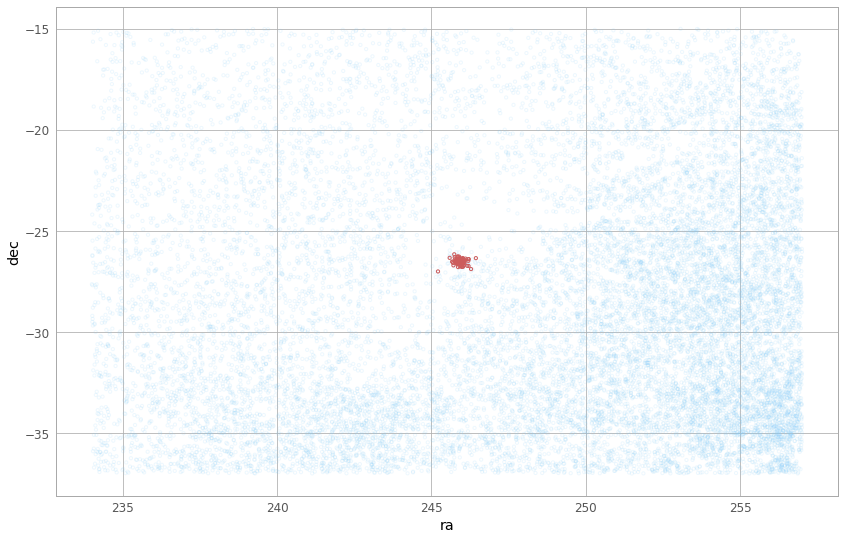

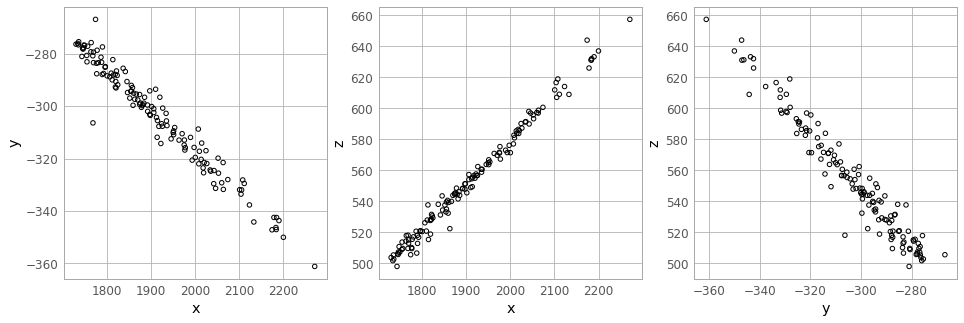

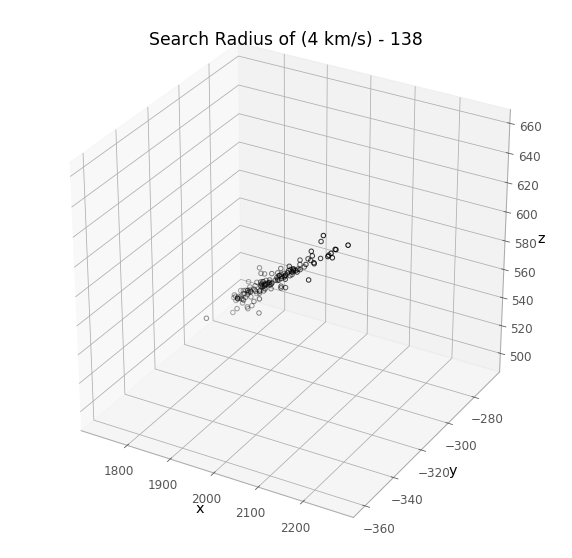

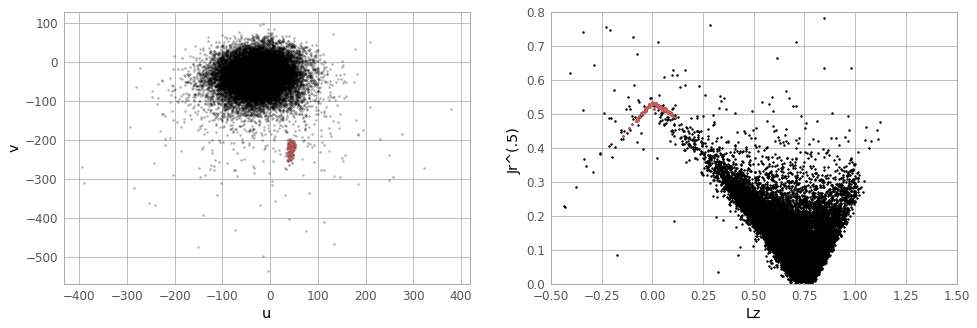

In [4]:
core_rv_gal = astroFrame(core_rv_eq)
core_rv_stae = pd.DataFrame(stae(core_rv_eq), columns = colz)

# filter of outlier - turns out to be high velocity star
fil = []
qwik_gal = []
qwik_eq = []

for i in range(len(core_rv_gal)):
    if core_rv_gal['u'][i] < 100 and core_rv_gal['u'][i] > -40:
        fil.append(list(core_rv_gal.loc[i]))
    else:
        qwik_gal.append(list(core_rv_gal.loc[i]))
        qwik_eq.append(list(core_rv_eq.loc[i]))
        
core_rv_gal = pd.DataFrame(fil,columns = list(core_rv_gal))
qwik_gal = pd.DataFrame(qwik_gal,columns = list(core_rv_gal))
qwik_eq = pd.DataFrame(qwik_eq,columns = list(core_rv_eq))

plt.figure(figsize=(14,9))
plt.scatter(messier['ra'],messier['dec'], alpha =.15, s=10, edgecolors = '#87cefa', facecolors='none')
plt.xlabel('ra')
plt.ylabel('dec')
plt.scatter(core_rv_eq['ra'], core_rv_eq['dec'], s=10, edgecolors = '#cd5c5c', facecolors='none')
plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize = (16,5))
ax1.scatter(core_rv_gal['x'],core_rv_gal['y'],s=20,edgecolors = 'k',facecolors='none')
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax2.scatter(core_rv_gal['x'],core_rv_gal['z'],s=20,edgecolors = 'k',facecolors='none')
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax3.scatter(core_rv_gal['y'],core_rv_gal['z'],s=20,edgecolors = 'k',facecolors='none')
ax3.set_xlabel('y'), ax3.set_ylabel('z')
plt.show()

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Search Radius of (4 km/s) - {}'.format(len(core_rv_gal)))

ax.scatter3D(core_rv_gal['x'], core_rv_gal['y'], core_rv_gal['z'], s=20, edgecolors = 'k', facecolors='none')
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (16,5))
ax1.scatter(messier_gal['u'],messier_gal['v'], alpha =.2, s=3,color = 'k')
ax1.scatter(core_rv_gal['u'],core_rv_gal['v'], alpha =.2, s=3,color = '#cd5c5c')
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax2.scatter(messier_stae['Lz'], (messier_stae['Jr'])**.5, alpha =1, s=2,color = 'k')
ax2.scatter(core_rv_stae['Lz'], (core_rv_stae['Jr'])**.5, s=2,color = '#cd5c5c')
ax2.set_xlabel('Lz')
ax2.set_ylabel('Jr^(.5) ')
ax2.set_xlim([-0.5,1.5])
ax2.set_ylim([0,.8])
plt.show()

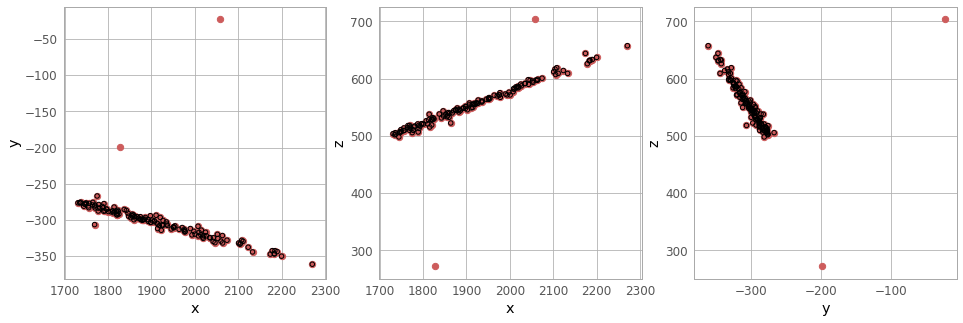

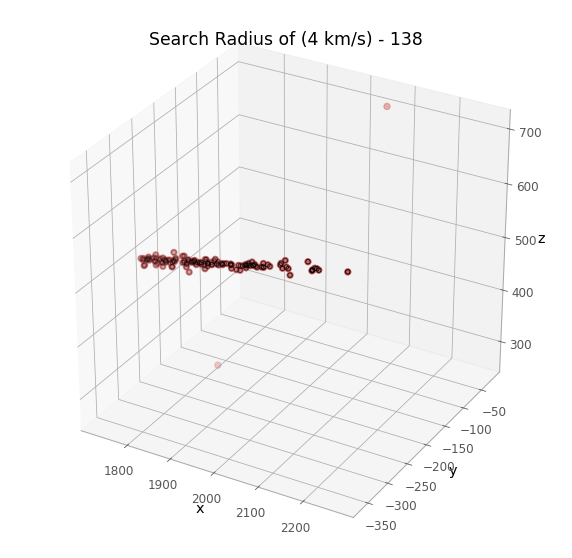

In [5]:
stars = []
raw = []
dv = 5

# stars and raw are just df's to demonstrate how different (u,v,w) of m4 is from the galaxy stars 
for i in range(len(messier_gal)):
    if messier_gal['u'][i] <= 50+dv and messier_gal['u'][i] >= 20-dv and \
    messier_gal['v'][i] <= max(core_rv_gal['v'])+dv and messier_gal['v'][i] >= min(core_rv_gal['v'])-dv and \
    messier_gal['w'][i] <= 0+dv and messier_gal['w'][i] >= -40-dv:
        stars.append(list(messier_gal.loc[i]))
        raw.append(list(messier.loc[i]))
        
stars = pd.DataFrame(stars,columns = list(messier_gal))
raw = pd.DataFrame(raw,columns = list(messier))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize = (16,5))
ax1.scatter(stars['x'], stars['y'], s=40, color = '#cd5c5c')
ax1.scatter(core_rv_gal['x'],core_rv_gal['y'],s=20,edgecolors = 'k',facecolors='none')

ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax2.scatter(stars['x'], stars['z'], s=40, color = '#cd5c5c')
ax2.scatter(core_rv_gal['x'],core_rv_gal['z'],s=20,edgecolors = 'k',facecolors='none')

ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax3.scatter(stars['y'], stars['z'], s=40, color = '#cd5c5c')
ax3.scatter(core_rv_gal['y'], core_rv_gal['z'], s=20,edgecolors = 'k', facecolors='none')

ax3.set_xlabel('y'), ax3.set_ylabel('z')
plt.show()

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Search Radius of (4 km/s) - {}'.format(len(core_rv_gal)))
ax.scatter3D(stars['x'], stars['y'], stars['z'], s=40, color = '#cd5c5c')
ax.scatter3D(core_rv_gal['x'], core_rv_gal['y'], core_rv_gal['z'], s=20, edgecolors = 'k', facecolors='none')
plt.show()

Messier 4's velocity is uncharacteristic of the field stars that it is embedded in. Unlike open clusters deep in the disk, a velocity filter is not viable to detect tidal tails. Due to the nature in which globular clusters evaporate, all of the tail stars that are of interest are low mass; and as a result, don't have radial velocity measurements for them. 

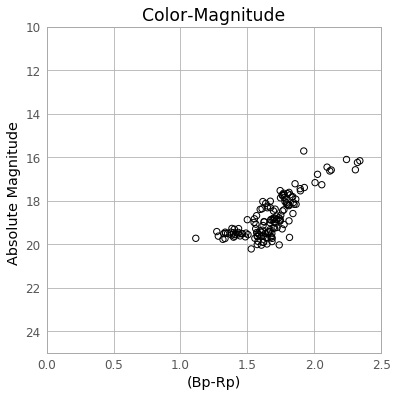

In [6]:
plt.figure(figsize=(6,6))
plt.title('Color-Magnitude')
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([0,2.5])
plt.ylim([25,10])

M_g = [abs_mag(core_rv_eq['phot_g_mean_mag'][i],core_rv_eq['parallax'][i]) for i in range(len(core_rv_eq['ra']))]
M_rp  = [abs_mag(core_rv_eq['phot_rp_mean_mag'][i],core_rv_eq['parallax'][i]) for i in range(len(core_rv_eq['ra']))]
M_b = [abs_mag(core_rv_eq['phot_bp_mean_mag'][i],core_rv_eq['parallax'][i]) for i in range(len(core_rv_eq['ra']))]
CI = color(M_rp,M_b)
plt.scatter(CI, M_g,marker='o',s=40,edgecolors = 'k',facecolors='none')
plt.show()

Due to the limitations of gaia's spectroscopy, it can only collect reliable radial velocities for stars that fall within the more blue part of the spectrum. A visual representation of this cut off is provided later in the following section. We use Gaussian Mixture Model (Expectation Maximization) to capture member stars without spectroscopic observations. 

# NGC 6121 - Initial Data without spectroscopic radial velocity

SELECT gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec,gaia.dec_error, 
gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error, gaia.parallax, 
gaia.parallax_error, gaia.phot_g_mean_mag, 
gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag 
FROM gaiadr2.gaia_source as gaia 
WHERE gaia.parallax >= 0.385  and gaia.parallax <= 0.55 and gaia.ra >  243.8 and gaia.ra < 248 
and gaia.dec > -29 and gaia.dec < -24 and gaia.parallax_error < 1 
and gaia.pmra_error < 1.5 and gaia.pmdec_error < 1.5 and 
gaia.pmra is not null and gaia.pmdec is not null and gaia.phot_bp_mean_mag is not null and 
gaia.phot_rp_mean_mag is not null and gaia.phot_g_mean_mag is not null

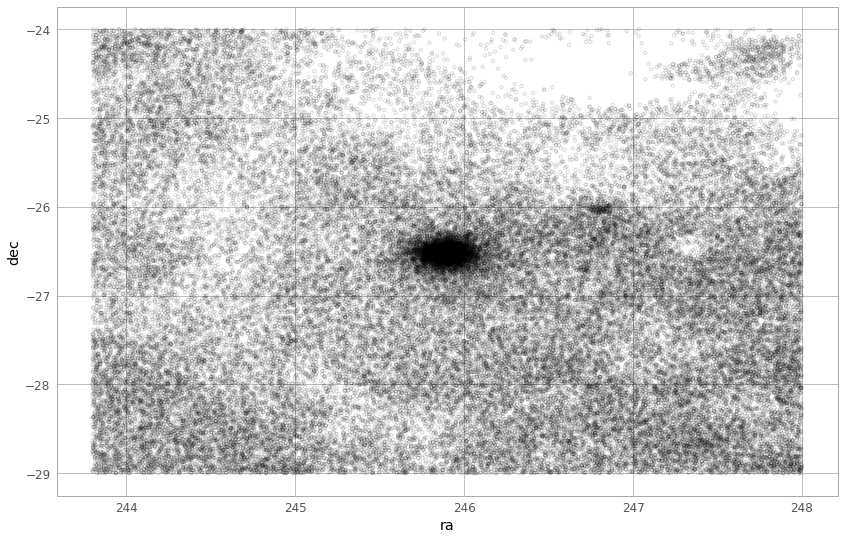

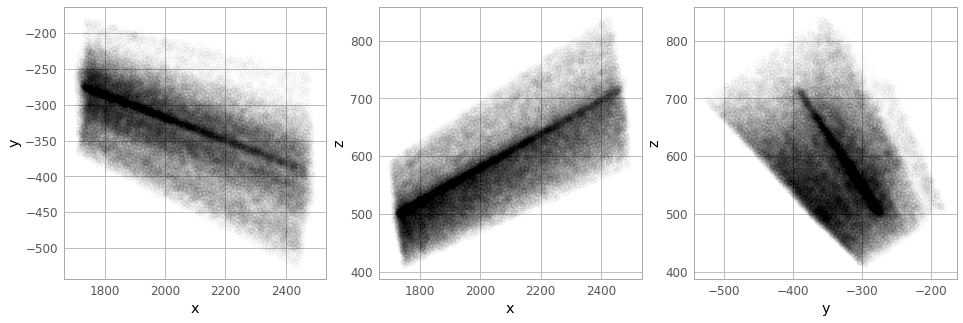

In [7]:
messier_worv = pd.read_csv('/Users/landonbuechner/Desktop/Astronomy/Messier 4/messier4_worv.csv')
messier_worv['id'] = [i for i in range(len(messier_worv))]
#astroFrame_norv(messier_worv).to_csv('messier4_worv_gal.csv', encoding='utf-8', index=False)
messier_worv_gal = pd.read_csv('/Users/landonbuechner/Desktop/Astronomy/Messier 4/messier4_worv_gal.csv')
messier_worv_gal['id'] = [i for i in range(len(messier_worv_gal))]

plt.figure(figsize=(14,9))
plt.scatter(messier_worv['ra'],messier_worv['dec'], alpha=.15, s=10, edgecolors = 'k', facecolors='none')
plt.xlabel('ra')
plt.ylabel('dec')
plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize = (16,5))
ax1.scatter(messier_worv_gal['x'],messier_worv_gal['y'],s=20,edgecolors = 'k',facecolors='none',alpha=.02)
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax2.scatter(messier_worv_gal['x'],messier_worv_gal['z'],s=20,edgecolors = 'k',facecolors='none',alpha=.02)
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax3.scatter(messier_worv_gal['y'],messier_worv_gal['z'],s=20,edgecolors = 'k',facecolors='none',alpha=.02)
ax3.set_xlabel('y'), ax3.set_ylabel('z')
plt.show()

Gaussian Mixture models 
- https://brilliant.org/wiki/gaussian-mixture-model/
- https://scikit-learn.org/stable/modules/mixture.html

sklearn GMM Documentation 

sklearn.mixture.GaussianMixture(n_components=1, covariance_type=’full’, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params=’kmeans’, weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

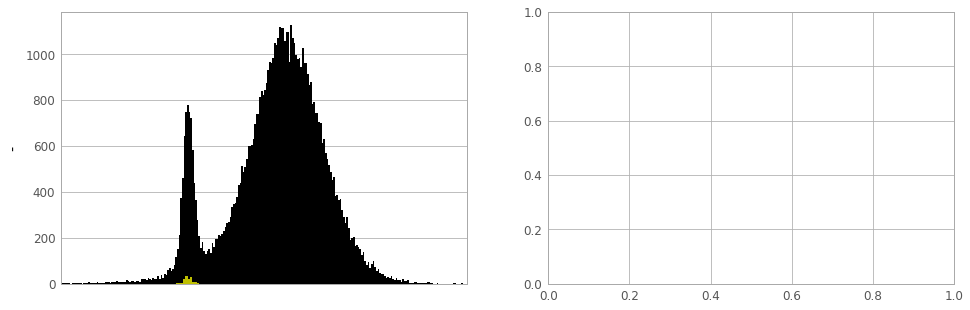

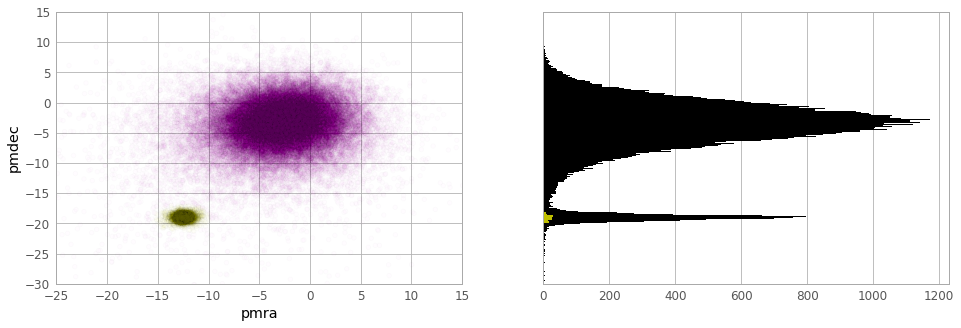

In [8]:
from sklearn.mixture import GaussianMixture

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (16,5))
ax1.hist(messier_worv['pmra'],bins=500, color = 'k')
ax1.hist(core_rv_eq['pmra'],color ='y')
ax1.set_ylabel('-')
ax1.set_xlim([-25,15])
ax1.set_xticks([])
ax2
plt.show() 

X = pd.DataFrame(columns = ['pmra','pmdec'])
X['pmra'] = messier_worv['pmra'] 
X['pmdec'] = messier_worv['pmdec']

gmm = GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (16,5))
ax1.scatter(X['pmra'], X['pmdec'], s=20, c=labels, cmap='spring', edgecolors = 'k', facecolors='none', alpha=.01)
ax1.set_xlim([-25,15])
ax1.set_ylim([-30,15])
ax1.set_xlabel('pmra')
ax1.set_ylabel('pmdec')
ax2.hist(messier_worv['pmdec'],bins=500, color = 'k',orientation="horizontal")
ax2.hist(core_rv_eq['pmdec'],color ='y',orientation="horizontal")
ax2.set_ylim([-30,15])
ax2.set_yticks([])
plt.show()

In [9]:
messier_worv['mix_lab'] = list(labels)

core_worv_eq = []
core_worv_gal = []
for i in range(len(messier_worv)):
    if messier_worv['mix_lab'][i] == 1:
        core_worv_eq.append(list(messier_worv.loc[i]))
        core_worv_gal.append(list(messier_worv_gal.loc[i]))
    
core_worv_eq = pd.DataFrame(core_worv_eq,columns = list(messier_worv))
core_worv_gal = pd.DataFrame(core_worv_gal,columns = list(messier_worv_gal))

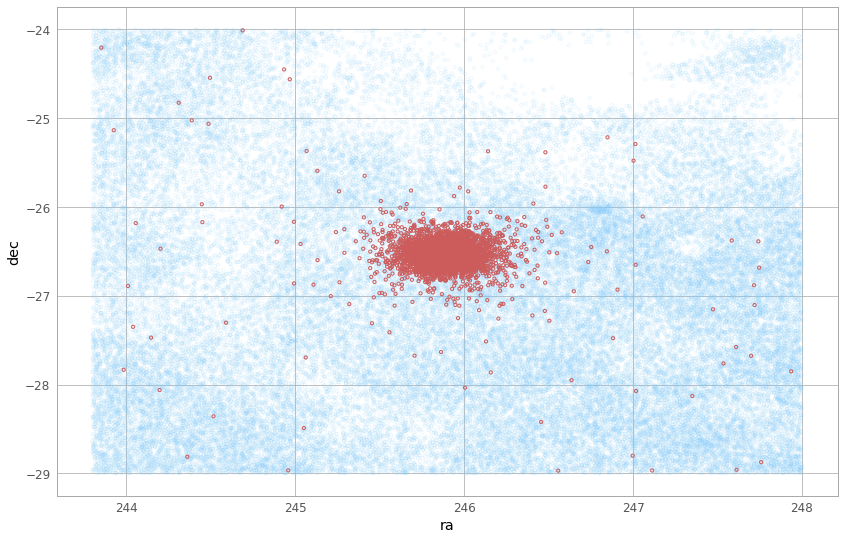

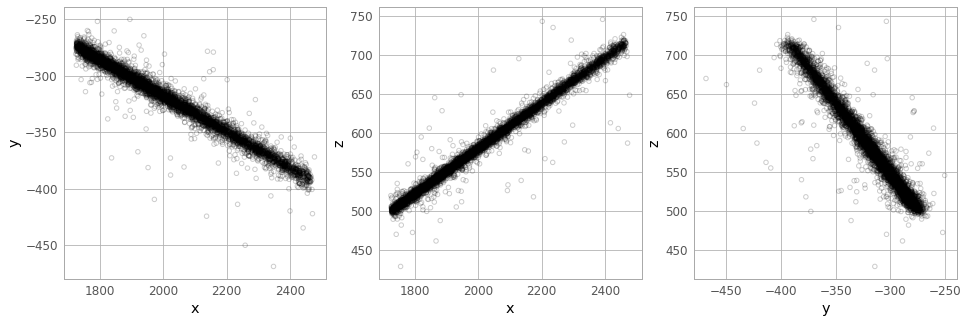

In [10]:
plt.figure(figsize=(14,9))
plt.scatter(messier_worv['ra'],messier_worv['dec'], alpha =.15, s=10, edgecolors = '#87cefa', facecolors='none')
plt.xlabel('ra')
plt.ylabel('dec')
plt.scatter(core_worv_eq['ra'], core_worv_eq['dec'], s=10, edgecolors = '#cd5c5c', facecolors='none')
plt.show()
                     
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize = (16,5))
ax1.scatter(core_worv_gal['x'],core_worv_gal['y'],s=20,edgecolors = 'k',facecolors='none',alpha=.2)
ax1.set_xlabel('x'), ax1.set_ylabel('y')
ax2.scatter(core_worv_gal['x'],core_worv_gal['z'],s=20,edgecolors = 'k',facecolors='none',alpha=.2)
ax2.set_xlabel('x'), ax2.set_ylabel('z')
ax3.scatter(core_worv_gal['y'],core_worv_gal['z'],s=20,edgecolors = 'k',facecolors='none',alpha=.2)
ax3.set_xlabel('y'), ax3.set_ylabel('z')
plt.show()

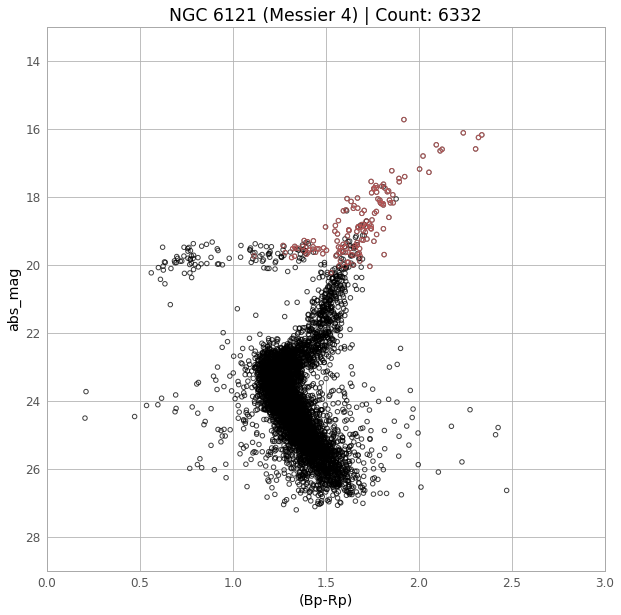

In [11]:
plt.figure(figsize=(10,10))
plt.title('NGC 6121 (Messier 4) | Count: {}'.format(len(core_rv_eq)+len(core_worv_eq)))
plt.xlabel('(Bp-Rp)')
plt.ylabel('abs_mag')
plt.xlim([0,3])
plt.ylim([29,13])

M_g1 = [abs_mag(core_worv_eq['phot_g_mean_mag'][i],core_worv_eq['parallax'][i]) for i in range(len(core_worv_eq['ra']))]
M_rp1  = [abs_mag(core_worv_eq['phot_rp_mean_mag'][i],core_worv_eq['parallax'][i]) for i in range(len(core_worv_eq['ra']))]
M_b1 = [abs_mag(core_worv_eq['phot_bp_mean_mag'][i],core_worv_eq['parallax'][i]) for i in range(len(core_worv_eq['ra']))]
CI1 = color(M_rp1,M_b1)

plt.scatter(CI1, M_g1,marker='o',s=20,edgecolors = 'k',facecolors='none',alpha = .75)
plt.scatter(CI, M_g,marker='o',s=20,edgecolors = '#cd5c5c',facecolors='none',alpha = .75)
plt.show()

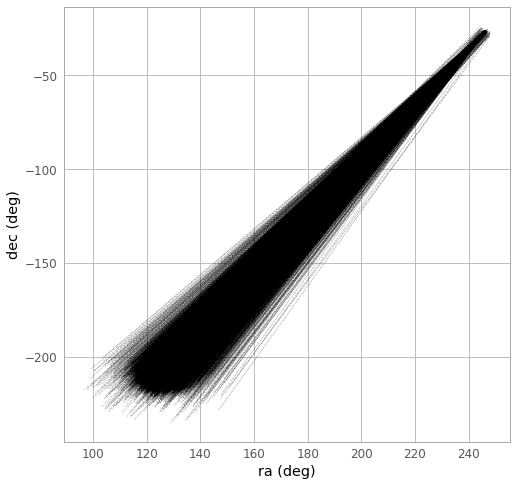

In [12]:
plt.figure(figsize=(8,8))
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')

ra0, dec0 = core_worv_eq['ra'], core_worv_eq['dec'] 
pmra, pmdec = mas_deg(core_worv_eq['pmra']), mas_deg(core_worv_eq['pmdec'])

for i in range(len(core_worv_eq)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*7000))
        dec.append(dec0[i]+(pmdec[i]*x*7000))
    plt.scatter(ra, dec, s = .01, c = 'k',alpha =.5)
plt.show()

# Radial velocity generation

Through a novel use of the moving cluster method, enabled by the acuracy of gaia's data, we generate artificial radial velocities characteristic of the core members. This is the first step to being able to detect large scale tidal streams generated by evaporating globular clusters. 

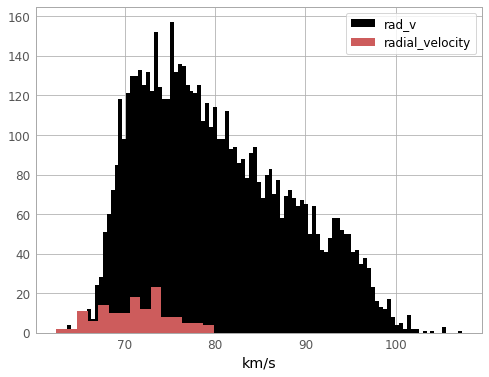

In [13]:
core_rv_eq = core_rv_eq; core_rv_gal = core_rv_gal
core_worv_eq = core_worv_eq

# dist and proper motion for rv, worv
core_rv_eq['dist'] = [1/(i/1000) for i in core_rv_eq['parallax']]
pm_scalar = []
for i in range(len(core_rv_eq['pmra'])):
    pm_scalar.append(np.sqrt((core_rv_eq['pmra'][i]/1000)**2+(core_rv_eq['pmdec'][i]/1000)**2))
core_rv_eq['pm_scalar'] = pm_scalar
core_worv_eq['dist'] = [1/(i/1000) for i in core_worv_eq['parallax']]
pm_scalar = []
for i in range(len(core_worv_eq['pmra'])):
    pm_scalar.append(np.sqrt((core_worv_eq['pmra'][i]/1000)**2+(core_worv_eq['pmdec'][i]/1000)**2))
core_worv_eq['pm_scalar'] = pm_scalar

# lambda 
lambd = []
for i in range(len(core_rv_eq)):
    x = 180*math.atan(4.74*core_rv_eq['pm_scalar'][i]/core_rv_eq['radial_velocity'][i]*core_rv_eq['dist'][i])/math.pi
    lambd.append(x)
lambd_av = np.mean(lambd)
    
rad_v = []
for i in range(len(core_worv_eq)):
    rv = (4.74*core_worv_eq['pm_scalar'][i]/(np.tan(np.radians(lambd_av))*(core_worv_eq['parallax'][i]/1000)))
    rad_v.append(rv)
    
core_worv_eq['rad_v'] = rad_v  

# filtering an extreme

filt_ex = []
for i in range(len(core_rv_eq)):
    if core_rv_eq['radial_velocity'][i] >= 40 and core_rv_eq['radial_velocity'][i] <= 150:
        filt_ex.append(list(core_rv_eq.loc[i]))
core_rv_eq = pd.DataFrame(filt_ex,columns = list(core_rv_eq))

plt.hist(core_worv_eq['rad_v'],bins = 100,color='k')
plt.hist(core_rv_eq['radial_velocity'],bins = 15,color='#cd5c5c')
plt.legend(['rad_v','radial_velocity'])
plt.xlabel('km/s')
plt.show()

# Conclusion

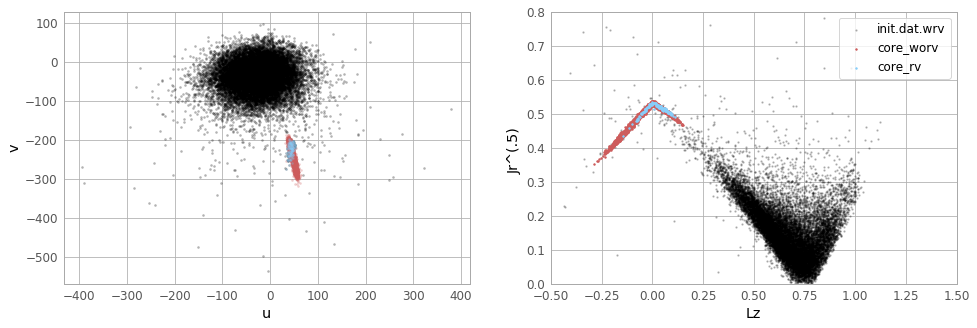

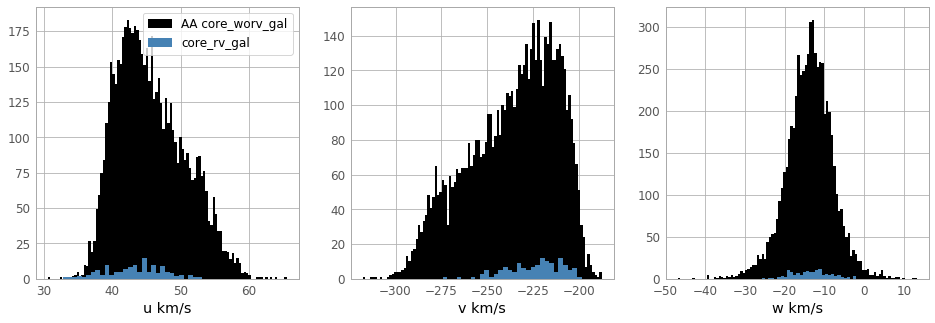

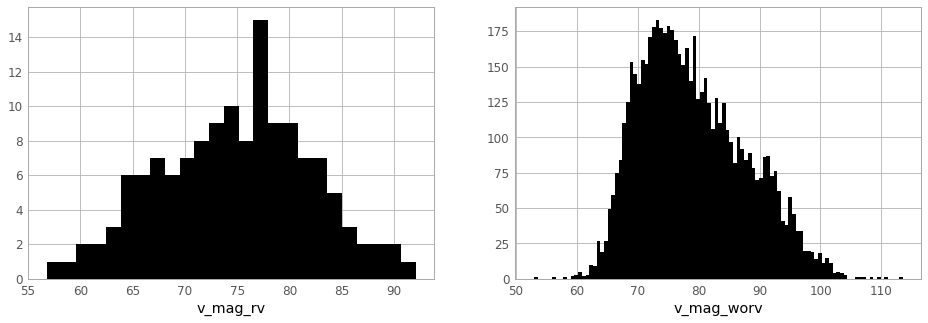

In [14]:
core_worv_gal = pd.read_csv('/Users/landonbuechner/Desktop/Astronomy/Messier 4/core_worv_gal.csv')
core_worv_stae = pd.read_csv('/Users/landonbuechner/Desktop/Astronomy/Messier 4/core_worv_stae.csv')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (16,5))
ax1.scatter(messier_gal['u'],messier_gal['v'], alpha =.2, s=3,color = 'k')
ax1.scatter(core_worv_gal['u'],core_worv_gal['v'], alpha =.2, s=3,color = '#cd5c5c')
ax1.scatter(core_rv_gal['u'],core_rv_gal['v'], alpha =.2, s=3,color = '#87cefa')
ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax2.scatter(messier_stae['Lz'], (messier_stae['Jr'])**.5, alpha =.2, s=2,color = 'k')
ax2.scatter(core_worv_stae['Lz'], (core_worv_stae['Jr'])**.5, s=2,color = '#cd5c5c')
ax2.scatter(core_rv_stae['Lz'], (core_rv_stae['Jr'])**.5, s=2,color = '#87cefa')
ax2.set_xlabel('Lz')
ax2.set_ylabel('Jr^(.5) ')
ax2.set_xlim([-0.5,1.5])
ax2.set_ylim([0,.8])
ax2.legend(['init.dat.wrv','core_worv','core_rv',])
plt.show()


f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize = (16,5))
ax1.hist(core_worv_gal['u'],bins=100,color = 'k')
ax1.hist(core_rv_gal['u'],color ='#4682b4',bins =30)
ax1.set_xlabel('u km/s')
ax1.legend(['AA core_worv_gal','core_rv_gal'],loc = 'upper right')

ax2.hist(core_worv_gal['v'],bins=100,color = 'k')
ax2.hist(core_rv_gal['v'],color ='#4682b4',bins =30)
ax2.set_xlabel('v km/s')

ax3.hist(core_worv_gal['w'],bins=100,color = 'k')
ax3.hist(core_rv_gal['w'],color ='#4682b4',bins =30)
ax3.set_xlabel('w km/s')
plt.show()

core_rv_gal['v_mag'] = [np.sqrt((core_rv_gal['u'][i]**2)+(core_rv_gal['u'][i]**2)+(core_rv_gal['u'][i]**2))\
         for i in range(len(core_rv_gal))]
core_worv_gal['v_mag'] = [np.sqrt((core_worv_gal['u'][i]**2)+(core_worv_gal['u'][i]**2)+(core_worv_gal['u'][i]**2))\
         for i in range(len(core_worv_gal))]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (16,5))
ax1.hist(core_rv_gal['v_mag'],color ='k',bins =25)
ax1.set_xlabel('v_mag_rv')
ax2.hist(core_worv_gal['v_mag'],color ='k',bins =100)
ax2.set_xlabel('v_mag_worv')
plt.show()

µ Distance: 2.125 kpc
µ Radial Velocity: 79.917 km/s
µ Radial Proper Motion: 0.023 mas/y

R(Center) = (x,y,z) = (2.018,-0.321,0.585) kpc
V(Center) = (u,v,w) = (45.629,-236.212,-13.78) km*s^-1


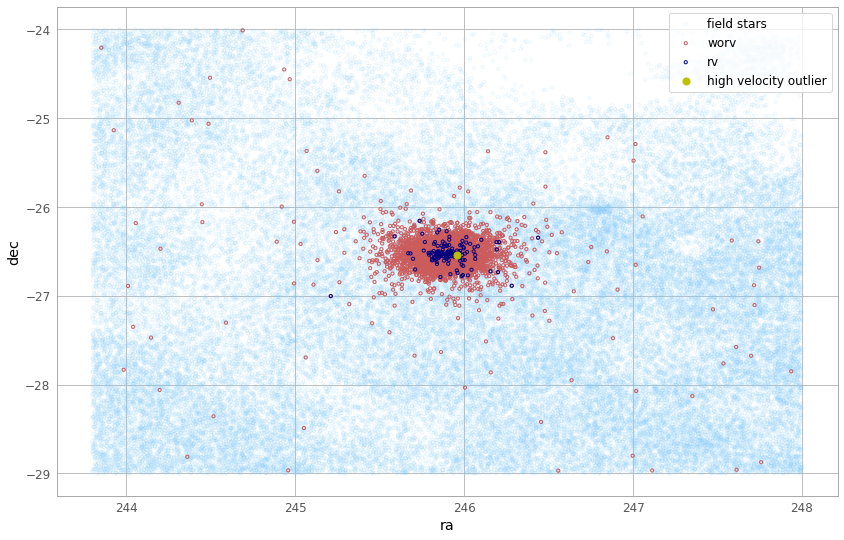


R(Outlier) = (x,y,z) = (2.076,-0.329,0.599) kpc
V(Outlier) = (u,v,w) = (-68.481,-232.86,-59.53) km*s^-1
|v| = 249.915 km/s


In [15]:
count = len(core_rv_eq) + len(core_worv_eq)

dis = ( (len(core_rv_eq)*np.mean(core_rv_eq['dist']))+\
            (len(core_worv_eq)*np.mean(core_worv_eq['dist'])) ) / count 
rv =  ( (len(core_rv_eq)*np.mean(core_rv_eq['radial_velocity']))+\
       (len(core_worv_eq)*np.mean(core_worv_eq['rad_v'])) ) / count 
pm = ( (len(core_rv_eq)*np.mean(core_rv_eq['pm_scalar']))+\
       (len(core_worv_eq)*np.mean(core_worv_eq['pm_scalar'])) ) / count 
x = ( (len(core_rv_gal)*np.mean(core_rv_gal['x']))+\
       (len(core_worv_gal)*np.mean(core_worv_gal['x'])) ) / count / 1000
y = ( (len(core_rv_gal)*np.mean(core_rv_gal['y']))+\
       (len(core_worv_gal)*np.mean(core_worv_gal['y'])) ) / count / 1000
z = ( (len(core_rv_gal)*np.mean(core_rv_gal['z']))+\
       (len(core_worv_gal)*np.mean(core_worv_gal['z'])) ) / count / 1000
u = ( (len(core_rv_gal)*np.mean(core_rv_gal['u']))+\
       (len(core_worv_gal)*np.mean(core_worv_gal['u'])) ) / count 
v = ( (len(core_rv_gal)*np.mean(core_rv_gal['v']))+\
       (len(core_worv_gal)*np.mean(core_worv_gal['v'])) ) / count 
w = ( (len(core_rv_gal)*np.mean(core_rv_gal['w']))+\
       (len(core_worv_gal)*np.mean(core_worv_gal['w'])) ) / count 


print('µ Distance: {} kpc'.format(np.round(dis/1000,3)))
print('µ Radial Velocity: {} km/s'.format(np.round(rv,3)))
print('µ Radial Proper Motion: {} mas/y'.format(np.round(pm,3)))
print('\nR(Center) = (x,y,z) = ({},{},{}) kpc\nV(Center) = (u,v,w) = ({},{},{}) km*s^-1'\
      .format(np.round(x,3),np.round(y,3),np.round(z,3),np.round(u,3),np.round(v,3),np.round(w,3)))

plt.figure(figsize=(14,9))
plt.xlabel('ra')
plt.ylabel('dec')
plt.scatter(messier_worv['ra'],messier_worv['dec'], alpha =.15, s=10, edgecolors = '#87cefa', facecolors='none')
plt.scatter(core_worv_eq['ra'], core_worv_eq['dec'], s=10, edgecolors = '#cd5c5c', facecolors='none')
plt.scatter(core_rv_eq['ra'], core_rv_eq['dec'], s=10, edgecolors = '#000080', facecolors='none')
plt.scatter(qwik_eq['ra'], qwik_eq['dec'], s=50,color = 'y')
plt.legend(['field stars','worv','rv','high velocity outlier'],loc = 'upper right')
plt.show()

print('\nR(Outlier) = (x,y,z) = ({},{},{}) kpc\nV(Outlier) = (u,v,w) = ({},{},{}) km*s^-1'\
      .format(np.round(qwik_gal['x'][0]/1000,3),np.round(qwik_gal['y'][0]/1000,3),np.round(qwik_gal['z'][0]/1000,3),\
              np.round(qwik_gal['u'][0],3),np.round(qwik_gal['v'][0],3),np.round(qwik_gal['w'][0],3)))
print('|v| = {} km/s'.format(np.round(np.sqrt((qwik_gal['u'][0]**2)+(qwik_gal['v'][0]**2)+(qwik_gal['w'][0]**2)),3)))